In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict 
from langchain_ollama import ChatOllama 


In [2]:
llm=ChatOllama(model="llama3.2:1b")

In [3]:
#defien llm state 
class Blogstate(TypedDict):
    title:str
    outline:str 
    content:str

In [4]:
def create_outline(state:Blogstate)->Blogstate:
    title=state["title"]
    prompt=f"create outline on this topic {title}"
    outline=llm.invoke(prompt).content
    state["outline"]=outline
    return state


def create_content(state:Blogstate)->Blogstate:
    title=state["title"]
    outline=state['outline']
    prompt=f"write blog on  {title} using outline{outline}"
    content=llm.invoke(prompt).content
    state["content"]=content
    return state



In [5]:
graph=StateGraph(Blogstate)

In [6]:
graph.add_node("create_outline",create_outline)
graph.add_node("create_content",create_content)

In [7]:
graph.add_edge(START,"create_outline")
graph.add_edge("create_outline","create_content")
graph.add_edge("create_content",END)

In [8]:
workflow=graph.compile()

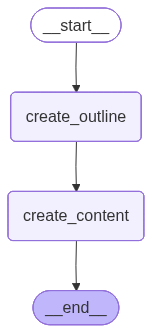

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())